# Quantum Reflection Simulations of Bose-Einstein Condensates

## Introduction

This Jupyter Notebook contains simulations of quantum reflections of Bose-Einstein Condensates (BEC) in various potentials using the Gross-Pitaevskii equation (GPE). Quantum reflection is a phenomenon where particles reflect off a potential without being classically repelled. This notebook explores the behavior of BECs when they encounter different types of potentials, including positive step potentials, negative step potentials, and Casimir-Polder potentials.

## Potentials Simulated

1. **Positive Step Potential**: This potential represents a sudden increase in potential energy. Quantum reflection in this scenario can reveal insights into the wave nature of BECs and the probability distribution of reflection coefficients.

2. **Negative Step Potential**: A sudden decrease in potential energy, which provides a different set of conditions for observing quantum reflection phenomena. This can help in understanding how BECs respond to attractive potentials.

3. **Casimir-Polder Potential**: This is a long-range potential resulting from quantum fluctuations. It is significant in the study of atom-surface interactions and can demonstrate unique reflection properties due to its non-trivial spatial dependency.

## Objectives

- To simulate the dynamics of BECs encountering different potentials using the Gross-Pitaevskii equation.
- To analyze the reflection coefficients and probability distributions for various potential setups.
- To visualize the wave function evolution and reflection patterns of BECs.

## Methodology

The simulations are conducted by solving the time-dependent Gross-Pitaevskii equation numerically. The BECs are modeled as macroscopic quantum wave packets, and their interactions with the potentials are analyzed.

- **Python Libraries**: The simulations make use of several Python libraries, including NumPy for numerical operations, SciPy for solving differential equations, and Matplotlib for visualization.

### Structure of the Notebook

1. **Setup and Initialization**: Importing necessary libraries and defining initial parameters.
2. **Simulation Functions**: Defining functions to simulate the BEC dynamics in different potentials.
3. **Positive Step Potential Simulation**: Running and visualizing the simulation for a positive step potential.
4. **Negative Step Potential Simulation**: Running and visualizing the simulation for a negative step potential.
5. **Casimir-Polder Potential Simulation**: Running and visualizing the simulation for a Casimir-Polder potential.

**Note:** The animations are currently deactivated to comply with GitHub's file size limitations. To activate the animations, please uncomment the relevant sections in the code.

**Case 1 : Positive Step Potential**

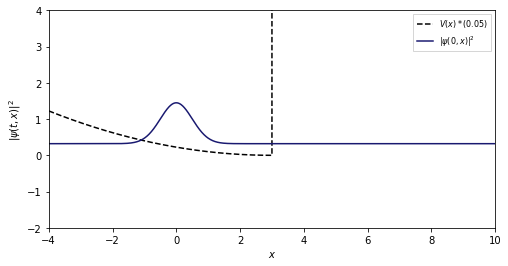

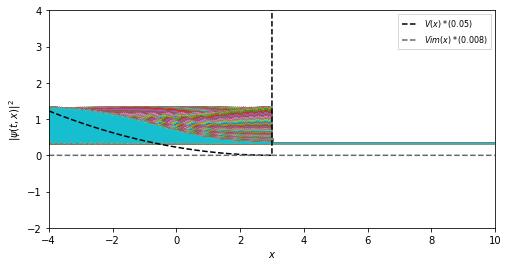

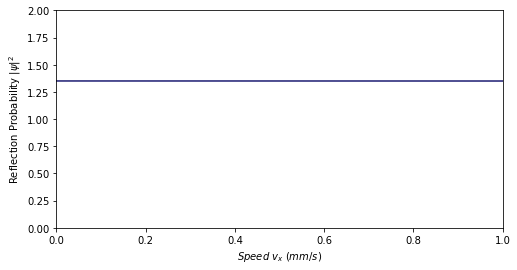

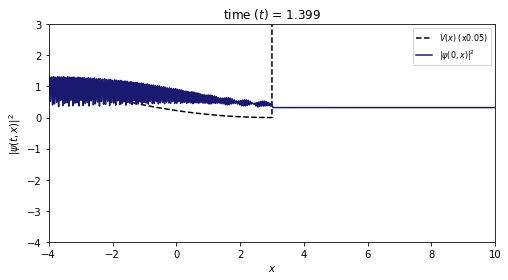

In [1]:
#------------------------------------------------Import Required Packages -----------------------------------------------------#
#______________________________________________________________________________________________________________________________#

from scipy import integrate
from scipy import sparse
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from numpy.linalg import norm 

#--------------------------------------------------Initialize Variables--------------------------------------------------------#
#______________________________________________________________________________________________________________________________#

dx     = 0.01                          # spatial separation
x      = np.arange(-4, 10, dx)         # spatial grid points
x0     = 0                             # center of initial gaussian wave-packet
xc     = 3.0                           # center of V(x)
sigma  = 0.5                           # width of initial gaussian wave-packet
A      = 1.0/(sigma * np.sqrt(np.pi))  # normalization constant
kx     = 50                            # wave number
m      = 1

#Parameter GPE

alpha       = 6e-6                # the s-wave scattering length -- Repulsive a > 0 (Nonlinear case)
N           = 3e5                   # normalized to the total number of atom (Na 23)
omega_x     = 2*np.pi*3.3           # longitudinal trap frequencie (Hz)
omega_trans = 2*np.pi*4.5           # transverse (radial) trap frequencies (Hz)

#initial wavefunction

psi0        = np.sqrt(A) * np.exp(-(x-x0)**2/(2.0 * sigma)) * np.exp(1j*kx*x)


#------------------------------------The Schematic of The Total Potential V(x) in System---------------------------------------#
#______________________________________________________________________________________________________________________________#

#Parameter Potential

delta_x    = xc-x0
V          = 0.5 * (x-xc)**2
delta_V    = 0.5 * 1.66e-27 * omega_x**2 * delta_x**2
V_h        = 5000                                        # height potential

for i, _x in enumerate(x):
    if _x > xc :
        V[i] = V_h

#---------------------------------make a plot of initial condition psi0 and total potential V(x)-------------------------------#
#______________________________________________________________________________________________________________________________#

fig = plt.figure(figsize=(8, 4))
plt.plot(x, V*0.05, "k--", label=r"$V(x)*(0.05)$")
plt.plot(x, np.absolute(psi0)**2+delta_V*1e23, color='midnightblue', linestyle='solid', label = r"$|\psi(0,x)|^2$")
plt.xlabel('$x$')
plt.ylabel('$|\psi(t,x)|^2$')
plt.legend(loc=1, fontsize=8, fancybox=False)
plt.xlim([-4, 10])
plt.ylim([-2, 4])
plt.legend(loc=1, fontsize=8,fancybox=False)
fig.savefig('QRPositiveVstep1.png')

#-------------Solve the Gross-Pitaevskii equation using combination of finite difference and runge kutta methods---------------#
#______________________________________________________________________________________________________________________________#

# Laplace Operator (Finite Difference)

D2 = sparse.diags([1, -2, 1], [-1, 0, 1], shape=(x.size, x.size)) / dx**2

# RHS of the dimensionless Gross-Pitaevskii Equation (GPE)

def psi_t(t, psi):
    return -1j * (- 0.5 * D2.dot(psi) + V * psi + 2 * alpha * (omega_trans/omega_x) *N * np.abs(psi)**2 * psi)

# Solve the Initial Value Problem (Runge-kutta)

dt = 0.001  # time interval for snapshots
t0 = 0.0    # initial time
tf = 1.4    # final time
t_eval = np.arange(t0, tf, dt)  # recorded time shots

sol = integrate.solve_ivp(psi_t,t_span=[t0, tf], y0=psi0, t_eval=t_eval, method="RK23")


#--------------------------------------------------Make a Plot of Solutions----------------------------------------------------#
#______________________________________________________________________________________________________________________________#

fig = plt.figure(figsize=(8, 4))
for i, t in enumerate(sol.t):
    sol2=np.abs(sol.y[:,i])**2
    normsol2=norm(sol2,np.inf)
    sol3=sol2/normsol2
    plt.plot(x,sol3+delta_V*1e23)
    
plt.plot(x, V * 0.05, "k--", label=r"$V(x)*(0.05)$")
plt.plot (x, np.imag(V*0.008), color='dimgray', linestyle='dashed', label=r"$Vim(x)*(0.008)$")
plt.xlabel('$x$')
plt.ylabel('$|\psi(t,x)|^2$')
plt.xlim([-4, 10])
plt.ylim([-2, 4])
plt.legend(loc=1, fontsize=8, fancybox=False)
fig.savefig('QRrecordPositiveVstep1.png')

#-----------------------------------------------Make a Plot of Reflection Probability------------------------------------------#
#______________________________________________________________________________________________________________________________#

#Parameter Reflection Probability

ndata = np.size(x)
p0 = 0.0
v0 = 0.0
deltax0 = 0.0
p = np.zeros(ndata)
v = np.zeros(ndata)
deltax = v = np.zeros(ndata)
p[0] = p0
v[0] = v0
deltax[0] = deltax0

#deltax = (x-xc)*1.61e-55
for i, _x in enumerate (x):        
    deltax[i] = (x[i]-xc)
            
kec = omega_x*deltax

for i, _x in enumerate (x):
    v[i] = kec[i]
       
for i, t in enumerate(sol.t):
    sol2= np.abs(sol.y[:,i])**2
    normsol2=norm(sol2,np.inf)
    sol3=sol2/normsol2
    p[i] = np.sum(sol2)*dx

        
fig = plt.figure(figsize=(8, 4))
plt.plot(v,p, color='midnightblue', linestyle='solid')
plt.xlabel('$Speed$ $v_x$ $(mm/s)$')
plt.ylabel('Reflection Probability $|\psi|^2$')
plt.xlim([0, 1])
plt.ylim([0, 2])
fig.savefig('RefProbabilityPositiveVstep1.png')

#------------------------------------------------Make a Simulation of Solutions------------------------------------------------#
#______________________________________________________________________________________________________________________________#

fig = plt.figure(figsize=(8, 4))

ax1 = plt.subplot(1, 1, 1)
ax1.set_xlim(-4,10)
ax1.set_ylim(-4, 3)
title = ax1.set_title('')
plt.xlabel('$x$')
plt.ylabel('$|\psi(t,x)|^2$')
line11, = ax1.plot([], [], "k--", label=r"$V(x)$ (x0.05)")
line12, = ax1.plot([], [], color='midnightblue', linestyle='solid', label=r'$|\psi(0,x)|^2$')
plt.legend(loc=1, fontsize=8, fancybox=False)


def animate(i):
    line11.set_data(x,V * 0.05)
    line12.set_data(x, np.abs(sol.y[:,i])*2/norm(np.abs(sol.y[:,i])*2,np.inf)+delta_V*1e23)
    title.set_text('time ($t$) = {0:1.3f}'.format(sol.t[i]))
    return line11, line12


anim = animation.FuncAnimation(fig, animate, frames=len(sol.t), interval=200, blit=True)
anim.save('QRPositivestep1.gif',writer='pillow',fps=50,dpi=100)

In [7]:
# Note: The animation is deactivated to reduce file size for GitHub.
# To activate the animation, uncomment the lines below and run the notebook locally.


#HTML(anim.to_jshtml())

**Case 2 : Negative Step Potential**

C:\Users\hp212\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\hp212\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


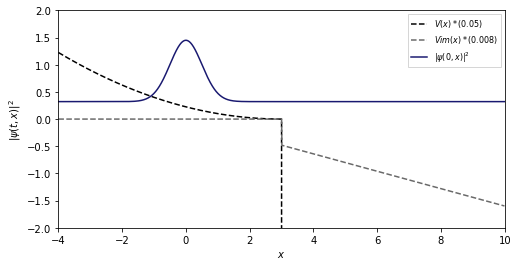

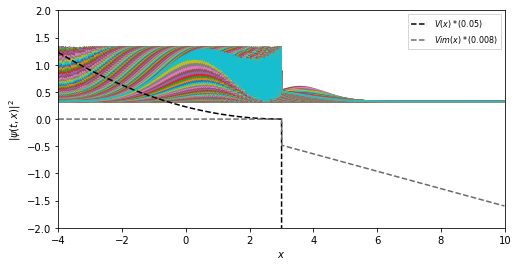

<Figure size 576x288 with 0 Axes>

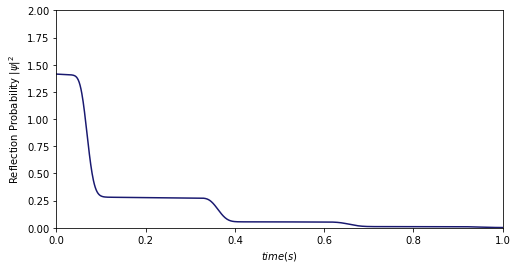

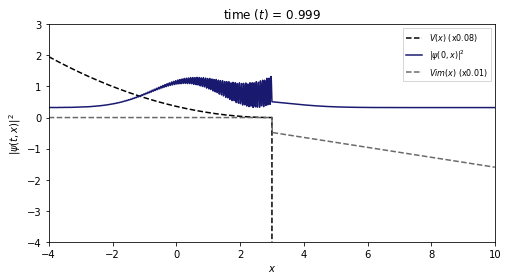

In [3]:
#------------------------------------------------Import Required Packages -----------------------------------------------------#
#______________________________________________________________________________________________________________________________#

from scipy import integrate
from scipy import sparse
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from numpy.linalg import norm 

#--------------------------------------------------Initialize Variables--------------------------------------------------------#
#______________________________________________________________________________________________________________________________#


dx     = 0.01                          # spatial separation
x      = np.arange(-4, 10, dx)         # spatial grid points
x0     = 0                             # center of initial gaussian wave-packet
xc     = 3.0                           # center of V(x)
sigma  = 0.5                           # width of initial gaussian wave-packet
A      = 1.0/(sigma * np.sqrt(np.pi))  # normalization constant
kx     = 50     

#Parameter GPE

alpha       = 6e-6 #2.9e-9                #is the s-wave scattering length -- Repulsive a > 0 (Nonlinear case)
N           = 3e5                   #is normalized to the total number of atom (Na 23)
omega_x     = 2*np.pi*3.3           #Longitudinal trap frequencie (Hz)
omega_trans = 2*np.pi*4.5           #transverse (radial) trap frequencies (Hz)

#initial wavefunction

psi0        = np.sqrt(A) * np.exp(-(x-x0)**2/(2.0 * sigma)) * np.exp(1j*kx*x)


#------------------------------------The Schematic of The Total Potential V(x) in System---------------------------------------#
#______________________________________________________________________________________________________________________________#

#Parameter Potential

V_h        = 5000                                       # height potential
V          = 0.5 * (x-xc)**2
Vtrap      = 0.5 * (x-xc)**2
delta_x    = xc-x0
delta_V    = 0.5 * 1.66e-27 * omega_x**2 * delta_x**2
Vim        = 20.0                                      #Refers to RG Scott 1.6e-26
Vimaginary = complex(0, Vim) * x

V = np.zeros(np.shape(x), dtype = complex)

for i, _x in enumerate(x):
    if _x <= xc:
        V[i] = Vtrap [i]
    elif _x > xc :
        V[i] = -V_h - Vimaginary[i]
        
#---------------------------------make a plot of initial condition psi0 and total potential V(x)-------------------------------#
#______________________________________________________________________________________________________________________________#

fig = plt.figure(figsize=(8, 4))
plt.plot(x, np.real(V*0.05), "k--", label=r"$V(x)*(0.05)$")
plt.plot (x, np.imag(V*0.008), color='dimgray', linestyle='dashed', label=r"$Vim(x)*(0.008)$")
plt.plot(x, np.absolute(psi0)**2+delta_V*1e23, color='midnightblue', linestyle='solid', label=r'$|\psi(0,x)|^2$')
plt.legend(loc=1, fontsize=8, fancybox=False)
plt.xlabel('$x$')
plt.ylabel('$|\psi(t,x)|^2$')
plt.xlim([-4, 10])
plt.ylim([-2, 2])
plt.legend(loc=1, fontsize=8,fancybox=False)
fig.savefig('QRNegativeVstep1.png')

#-------------Solve the Gross-Pitaevskii equation using combination of finite difference and runge kutta methods---------------#
#______________________________________________________________________________________________________________________________#

# Laplace Operator (Finite Difference)

D2 = sparse.diags([1, -2, 1], [-1, 0, 1], shape=(x.size, x.size)) / dx**2

# RHS of the dimensionless Gross-Pitaevskii Equation (GPE)

def psi_t(t, psi):
    return -1j * (- 0.5 * D2.dot(psi) + V * psi + 2 * alpha * (omega_trans/omega_x) *N * np.abs(psi)**2 * psi)

# Solve the Initial Value Problem (Runge-kutta)

dt = 0.001  # time interval for snapshots
t0 = 0.0    # initial time
tf = 1    # final time
t_eval = np.arange(t0, tf, dt)  # recorded time shots

sol = integrate.solve_ivp(psi_t,t_span=[t0, tf], y0=psi0, t_eval=t_eval, method="RK23")

#--------------------------------------------------Make a Plot of Solutions----------------------------------------------------#
#______________________________________________________________________________________________________________________________#

fig = plt.figure(figsize=(8, 4))
for i, t in enumerate(sol.t):
    sol2=np.abs(sol.y[:,i])**2
    normsol2=norm(sol2,np.inf)
    sol3=sol2/normsol2
    plt.plot(x,sol3+delta_V*1e23)
    
plt.plot(x, V * 0.05, "k--", label=r"$V(x)*(0.05)$")
plt.plot (x, np.imag(V*0.008), color='dimgray', linestyle='dashed', label=r"$Vim(x)*(0.008)$")
plt.xlabel('$x$')
plt.ylabel('$|\psi(t,x)|^2$')
plt.xlim([-4, 10])
plt.ylim([-2, 2])
plt.legend(loc=1, fontsize=8, fancybox=False)
fig.savefig('QRrecordNegativeVstep1.png')

#-----------------------------------------------Make a Plot of Reflection Probability------------------------------------------#
#______________________________________________________________________________________________________________________________#

#Parameter Reflection Probability

ndata = 1000
p0    = 0.0
p     = np.zeros(ndata)
p[0]  = p0

fig = plt.figure(figsize=(8, 4))
for i, t in enumerate(sol.t):
    sol2=np.abs(sol.y[:,i])**2
    p[i] = np.sum(sol2)*dx
        
fig = plt.figure(figsize=(8, 4))
plt.plot(sol.t,p, color='midnightblue', linestyle='solid')
plt.xlabel('$time (s)$')
plt.ylabel('Reflection Probability $|\psi|^2$')
plt.xlim([0, 1])
plt.ylim([0, 2])
fig.savefig('RefProbabilityNegativeVstep1.png')

#------------------------------------------------Make a Simulation of Solutions------------------------------------------------#
#______________________________________________________________________________________________________________________________#

fig = plt.figure(figsize=(8, 4))
ax1 = plt.subplot(1, 1, 1)
ax1.set_xlim(-4,10)
ax1.set_ylim(-4, 3)
title = ax1.set_title('')
plt.xlabel('$x$')
plt.ylabel('$|\psi(t,x)|^2$')
line11, = ax1.plot([], [], "k--", label=r"$V(x)$ (x0.08)")
line12, = ax1.plot([], [], color='midnightblue', linestyle='solid', label=r'$|\psi(0,x)|^2$')
line13, = ax1.plot([], [], color='dimgray', linestyle='dashed', label=r"$Vim(x)$ (x0.01)")
plt.legend(loc=1, fontsize=8, fancybox=False)

def animate(i):
    line11.set_data(x,V * 0.08)
    line12.set_data(x, np.abs(sol.y[:,i])**2/norm(np.abs(sol.y[:,i])**2,np.inf)+delta_V*1e23)
    line13.set_data(x,np.imag(V*0.008))
    title.set_text('time ($t$) = {0:1.3f}'.format(sol.t[i]))
    return line11, line12


anim = animation.FuncAnimation(fig, animate, frames=len(sol.t), interval=200, blit=True)
anim.save('QRNegativeVstep1.gif',writer='pillow',fps=50,dpi=100)

In [8]:
# Note: The animation is deactivated to reduce file size for GitHub.
# To activate the animation, uncomment the lines below and run the notebook locally.

#HTML(anim.to_jshtml())

**Case 3 : Casimir-Polder Potential**

C:\Users\hp212\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\hp212\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


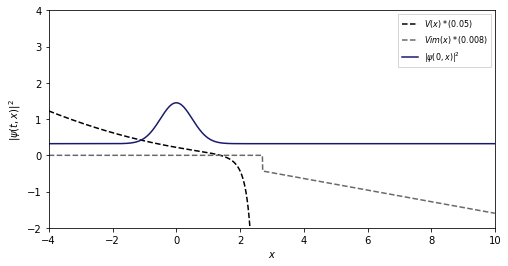

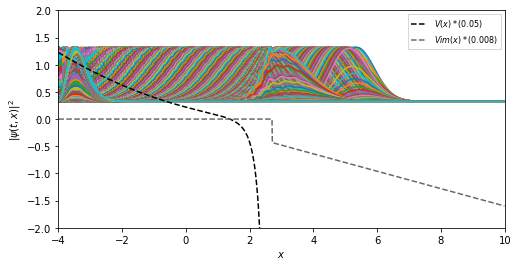

<Figure size 576x288 with 0 Axes>

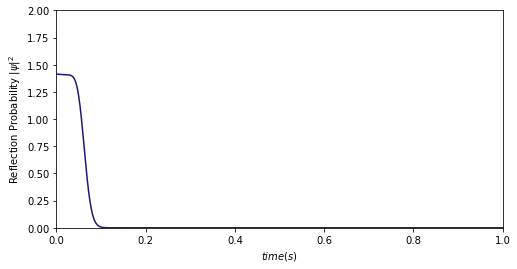

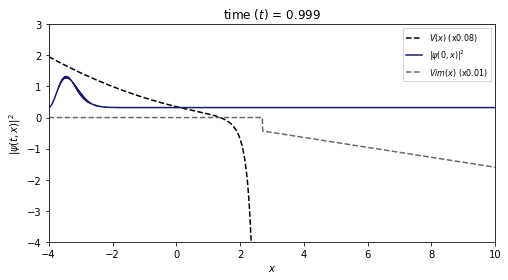

In [5]:
#------------------------------------------------Import Required Packages -----------------------------------------------------#
#______________________________________________________________________________________________________________________________#

from scipy import integrate
from scipy import sparse
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from numpy.linalg import norm 

#--------------------------------------------------Initialize Variables--------------------------------------------------------#
#______________________________________________________________________________________________________________________________#


dx     = 0.01                          # spatial separation
x      = np.arange(-4, 10, dx)         # spatial grid points
x0     = 0                             # center of initial gaussian wave-packet
xc     = 3.0                           # center of V(x)
sigma  = 0.5                           # width of initial gaussian wave-packet
A      = 1.0/(sigma * np.sqrt(np.pi))  # normalization constant
kx     = 50     

#Parameter GPE

alpha       = 6e-6                #is the s-wave scattering length -- Repulsive a > 0 (Nonlinear case)
N           = 3e5                   #is normalized to the total number of atom (Na 23)
omega_x     = 2*np.pi*3.3           #Longitudinal trap frequencie (Hz)
omega_trans = 2*np.pi*4.5           #transverse (radial) trap frequencies (Hz)

#initial wavefunction
psi0        = np.sqrt(A) * np.exp(-(x-x0)**2/(2.0 * sigma)) * np.exp(1j*kx*x)


#------------------------------------The Schematic of The Total Potential V(x) in System---------------------------------------#
#______________________________________________________________________________________________________________________________#

# Parameter Potential

V           = 0.5 * (x-xc)**2
Vtrap       = 0.5 * (x-xc)**2
Vim         = 20.0                                                      #Refers to RG Scott 1.6e-26
Vimaginary  = complex(0, Vim) * x
delta_x     = xc-x0
delta_V     = 0.5 * 1.66e-27 * omega_x**2 * delta_x**2
xaksen      = x-delta_x
C4          = 91e-57
Lambda_a    = 590e-9
cut_off     = 0.3
Vcp         = -C4/(xaksen**3*(xaksen+3*Lambda_a/2*(np.pi)**2))*(1e56)    # (1e56) is scaling factor of Vcp
Vcpaksen    = -C4/(cut_off**3*(cut_off+3*Lambda_a/2*(np.pi)**2))*(1e56)  # (1e56) is scaling factor of Vcpaksen

V = np.zeros(np.shape(x), dtype = complex)

for i, _x in enumerate (x):
    if _x < delta_x-cut_off:
        V[i] = Vtrap[i] + Vcp[i]
    elif _x > delta_x-cut_off:
         V[i]= Vcpaksen - Vimaginary[i]
            
        
#---------------------------------make a plot of initial condition psi0 and total potential V(x)-------------------------------#
#______________________________________________________________________________________________________________________________#


fig = plt.figure(figsize=(8, 4))
plt.plot(x, np.real(V*0.05), "k--", label=r"$V(x)*(0.05)$")
plt.plot (x, np.imag(V*0.008), color='dimgray', linestyle='dashed', label=r"$Vim(x)*(0.008)$")
plt.plot(x, np.absolute(psi0)**2+delta_V*1e23, color='midnightblue', linestyle='solid', label=r'$|\psi(0,x)|^2$')
plt.legend(loc=1, fontsize=8, fancybox=False)
plt.xlabel('$x$')
plt.ylabel('$|\psi(t,x)|^2$')
plt.xlim([-4, 10])
plt.ylim([-2, 4])
plt.legend(loc=1, fontsize=8,fancybox=False)
fig.savefig('QRVCasimirPolder1.png')


#-------------Solve the Gross-Pitaevskii equation using combination of finite difference and runge kutta methods---------------#
#______________________________________________________________________________________________________________________________#


# Laplace Operator (Finite Difference)

D2 = sparse.diags([1, -2, 1], [-1, 0, 1], shape=(x.size, x.size)) / dx**2

# RHS of the dimensionless Gross-Pitaevskii Equation (GPE)

def psi_t(t, psi):
    return -1j * (- 0.5 * D2.dot(psi) + V * psi + 2 * alpha * (omega_trans/omega_x) *N * np.abs(psi)**2 * psi)

# Solve the Initial Value Problem (Runge-kutta)

dt = 0.001  # time interval for snapshots
t0 = 0.0    # initial time
tf = 1    # final time
t_eval = np.arange(t0, tf, dt)  # recorded time shots

sol = integrate.solve_ivp(psi_t,t_span=[t0, tf], y0=psi0, t_eval=t_eval, method="RK23")


#--------------------------------------------------Make a Plot of Solutions----------------------------------------------------#
#______________________________________________________________________________________________________________________________#


fig = plt.figure(figsize=(8, 4))
for i, t in enumerate(sol.t):
    sol2=np.abs(sol.y[:,i])**2
    normsol2=norm(sol2,np.inf)
    sol3=sol2/normsol2
    plt.plot(x,sol3+delta_V*1e23)
    
plt.plot(x, V * 0.05, "k--", label=r"$V(x)*(0.05)$")
plt.plot (x, np.imag(V*0.008), color='dimgray', linestyle='dashed', label=r"$Vim(x)*(0.008)$")
plt.xlabel('$x$')
plt.ylabel('$|\psi(t,x)|^2$')
plt.xlim([-4, 10])
plt.ylim([-2, 2])
plt.legend(loc=1, fontsize=8, fancybox=False)
fig.savefig('QRrecordVCP.png')

#-----------------------------------------------Make a Plot of Reflection Probability------------------------------------------#
#______________________________________________________________________________________________________________________________#

#Parameter Reflection Probability

ndata = 1000
p0    = 0.0
p     = np.zeros(ndata)
p[0]  = p0

fig = plt.figure(figsize=(8, 4))
for i, t in enumerate(sol.t):
    sol2=np.abs(sol.y[:,i])**2
    p[i] = np.sum(sol2)*dx
        
fig = plt.figure(figsize=(8, 4))
plt.plot(sol.t,p, color='midnightblue', linestyle='solid')
plt.xlabel('$time (s)$')
plt.ylabel('Reflection Probability $|\psi|^2$')
plt.xlim([0, 1])
plt.ylim([0, 2])
fig.savefig('RefProbabilityVCP.png')

#------------------------------------------------Make a Simulation of Solutions------------------------------------------------#
#______________________________________________________________________________________________________________________________#

fig = plt.figure(figsize=(8, 4))

ax1 = plt.subplot(1, 1, 1)
ax1.set_xlim(-4,10)
ax1.set_ylim(-4, 3)
title = ax1.set_title('')
plt.xlabel('$x$')
plt.ylabel('$|\psi(t,x)|^2$')
line11, = ax1.plot([], [], "k--", label=r"$V(x)$ (x0.08)")
line12, = ax1.plot([], [], color='midnightblue', linestyle='solid', label=r'$|\psi(0,x)|^2$')
line13, = ax1.plot([], [], color='dimgray', linestyle='dashed', label=r"$Vim(x)$ (x0.01)")
plt.legend(loc=1, fontsize=8, fancybox=False)


def animate(i):
    line11.set_data(x,V * 0.08)
    line12.set_data(x, np.abs(sol.y[:,i])**2/norm(np.abs(sol.y[:,i])**2,np.inf)+delta_V*1e23)
    line13.set_data(x,np.imag(V*0.008))
    title.set_text('time ($t$) = {0:1.3f}'.format(sol.t[i]))
    return line11, line12


anim = animation.FuncAnimation(fig, animate, frames=len(sol.t), interval=200, blit=True)
anim.save('QRVCasimirPolder1.gif',writer='pillow',fps=50,dpi=100)

In [9]:
# Note: The animation is deactivated to reduce file size for GitHub.
# To activate the animation, uncomment the lines below and run the notebook locally.

#HTML(anim.to_jshtml())